In [33]:
from __future__ import division, unicode_literals, print_function

import os
import sys
import argparse
import matplotlib.pyplot as mpl
import numpy as np
import astropy.io.fits as pyfits
import skimage.morphology as morph
import skimage.exposure as skie
from contextlib import suppress
import skimage.io
from scipy import ndimage
from astropy.table import Table

#Initialize seed for code reproducibility
seed=42
def define_seed(seed):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
#import python astronomy and astrophysics package    
from astropy.io import fits

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
image_file='c4d_131207_031640_ooi_g_d1.013.fits_d1.SE.BACKGROUND.fits'
hdu=fits.open(image_file)
hdu_prim=hdu[0].data
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4094, 2046)


In [37]:
#creates a new image using an mapping arc sinh that captures the full dynamic range effectively
#It locates lower and upper bounds that should include only stars
#The parameters would probably have to be refined to optimize the extraction of stars from background
limg = np.arcsinh(image_data)
limg = limg / limg.max()
low = np.percentile(limg, 0.25)
high = np.percentile(limg, 99.5)
opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high))
#Here we need to return a boolean array of the point that are on the loca maximum, as True and False
lm =morph.local_maxima(limg)

x1, y1 = np.where(lm.T == True)
v = limg[(y1,x1)]
lim = 0.7
x2, y2 = x1[v > lim], y1[v > lim]

/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:278: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):
/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:111: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):


In [38]:
print("These are the values of x2: {}".format(x2))
np.savetxt("x_coordinate_2.csv", x2, delimiter=",")
print(x2.shape)

print("These are the values of y2: {}".format(y2))
np.savetxt("y_coordinate_2.csv", y2, delimiter=",")
print(y2.shape)

These are the values of x2: [   0    0    0 ... 2045 2045 2045]
(24351,)
These are the values of y2: [   0    1  542 ... 3714 3715 4093]
(24351,)


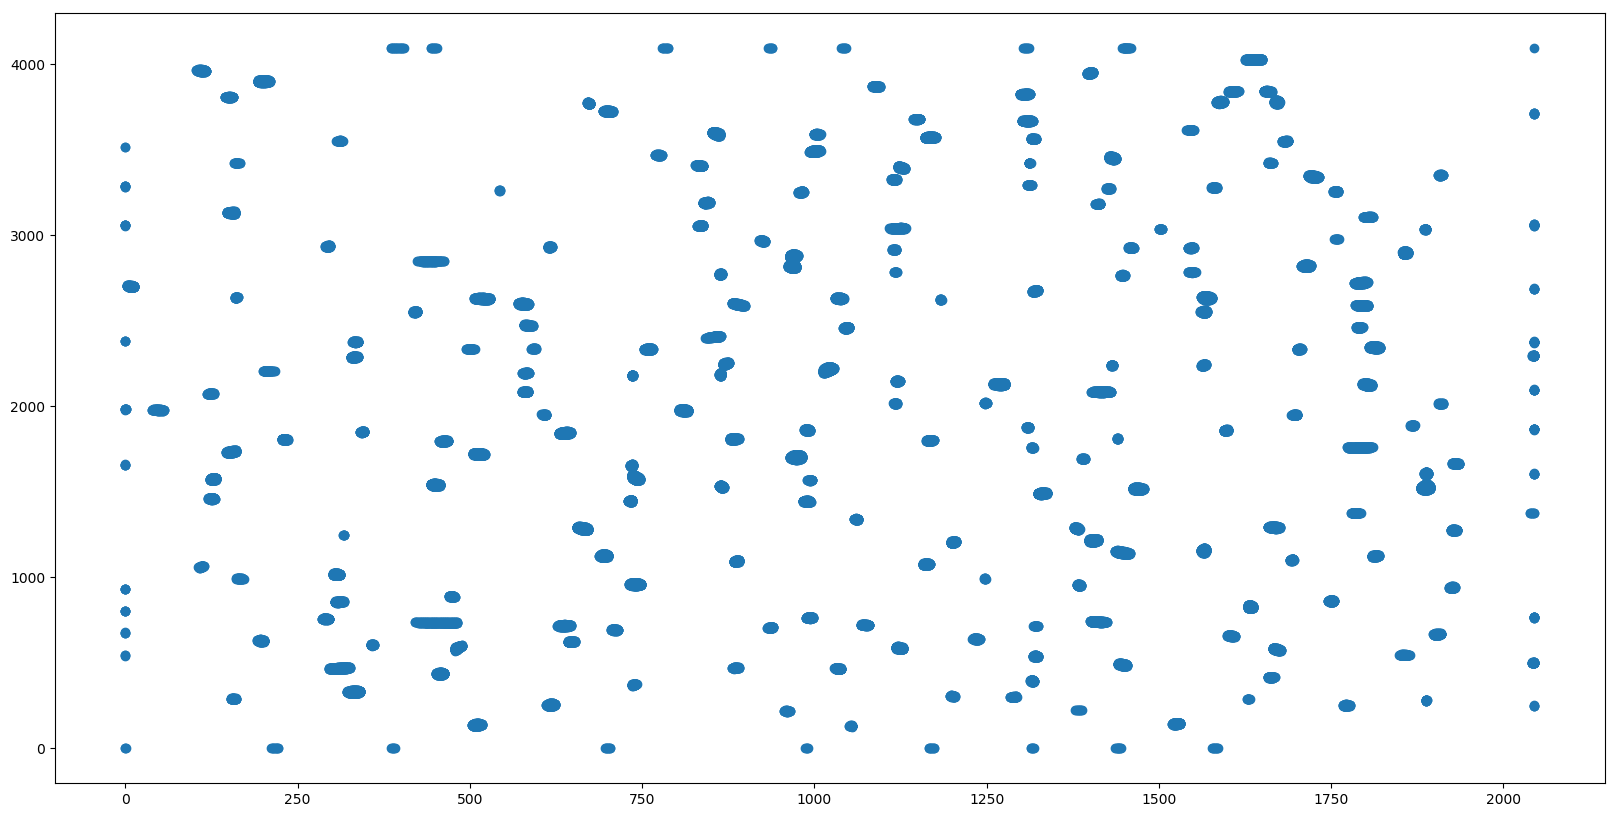

In [39]:
#Plot all these cpprdinate points as scatter plot
plt.figure(figsize=(20,10))
plt.scatter(x2,y2)
plt.show()

In [40]:
#First convert the corrdinate to an iteger or slices
points=list(zip(x2, y2))
print("The Dimension of this array is: {}".format(np.shape(points)))

The Dimension of this array is: (24351, 2)


In [41]:
#Secondly convert these intergers to an array
points=np.array(points)
print('The dimension of this array is: {}'.format(points.shape))

The dimension of this array is: (24351, 2)


In [42]:
points_coord=np.savetxt("image_coord_3.csv", points, delimiter=",")

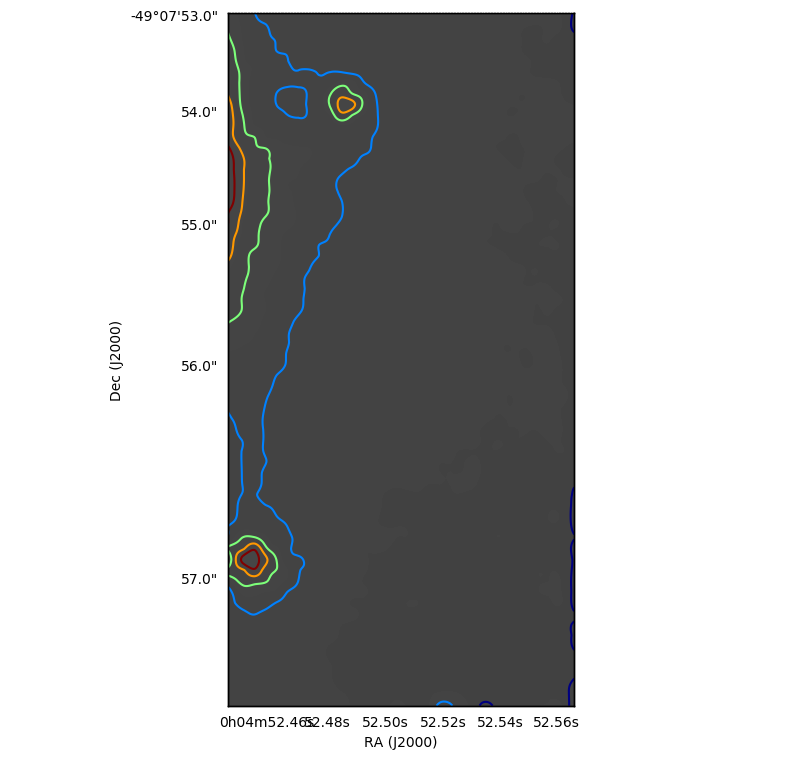

In [62]:
import aplpy
gc=aplpy.FITSFigure('c4d_131207_031640_ooi_g_d1.002.fits_d1.SE.BACKGROUND.fits')
gc.show_contour()
gc.tick_labels.show()
gc.show_grayscale(vmin=1.0,vmax=2000., stretch='sqrt')

In [61]:
import numpy as np
raw_data="image_coord_3.csv"
data = np.loadtxt(raw_data, delimiter=",")
ra, dec = data[:, 0], data[:, 1]
gc.show_markers(ra, dec, edgecolor='green', facecolor='none',
                marker='o', s=10, alpha=0.5)

gc.list_layers()
gc.show_markers(ra, dec, layer='marker_set_1', edgecolor='red',
                facecolor='none', marker='o', s=10, alpha=0.5)

#save the plot
gc.save('myfirstplot_3.png')


  There are 5 layers in this figure:

   -> contour_set_1
   -> marker_set_1
   -> marker_set_2
   -> marker_set_3
   -> marker_set_4
